In [1]:
import numpy as np
import pandas as pd
import torch
from IPython.display import display
from torch import nn
from torch.utils.data import DataLoader

from sequence_dataset import SequenceDataset
from shallow_regression_lstm import ShallowRegressionLSTM

## Read data

---

In [2]:
df = pd.read_csv('../input_data/data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102',
       'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203',
       'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')

In [4]:
df.tail()

,Unnamed: 0,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
946714,946714,2016-01-02 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,...,2,1,251.1535,0.865024,189.0220,0.0,1,1,1,0
946715,946715,2016-01-02 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0
946716,946716,2016-01-02 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0
946717,946717,2016-01-02 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0
946718,946718,2016-01-02 14:59:59,2.501681,521.1196,2,2,1,168.0979,8.638683,301.9226,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%d %H:%M:%S")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.sort_values(by=['Timestamp'], inplace=True)

In [6]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [8]:
df.dropna()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946714,2016-01-02 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.15350,0.865024,189.022000,0.000000,1,1,1,0
946715,2016-01-02 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.07340,0.865024,188.925900,0.000000,1,1,1,0
946716,2016-01-02 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.07340,0.865024,188.925900,0.000000,1,1,1,0
946717,2016-01-02 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.07340,0.865024,188.925900,0.000000,1,1,1,0


In [9]:
df.set_index('Timestamp', inplace=True)

In [10]:
df.tail()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-02 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,2,1,251.1535,0.865024,189.0220,0.0,1,1,1,0
2016-01-02 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0
2016-01-02 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0
2016-01-02 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0
2016-01-02 14:59:59,2.501681,521.1196,2,2,1,168.0979,8.638683,301.9226,2.458206,2,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,0


In [13]:
features = df.columns.values.tolist()
features.remove('Normal/Attack')

In [14]:
# Remove first five hours required for stabilization from dataset
new_start_idx = df.index.get_loc((df.index[0] + pd.DateOffset(hours=5)), method='nearest')
print("Crop measurements before: ", df.index[new_start_idx])
measurements_df = df.drop(df[(df.index < df.index[new_start_idx])].index)

Crop measurements before:  2015-12-22 21:00:00


In [15]:
# Split to categorical and numerical features

categorical_features = []
numerical_features = []
const_features = []

for feature in features:
    values_count = len(measurements_df[feature].unique())
    if values_count == 1:
        const_features.append(feature)
    elif values_count < 10: # 
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)    

In [16]:
# Remove const features
measurement_features = [f for f in features if f not in const_features]
measurements_df.drop(const_features, axis=1, inplace=True)

In [17]:
measurements_df.tail()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-02 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.288971,0.734885,0.306569,2,251.1535,0.865024,189.0220,0.0,1,0
2016-01-02 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.272704,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.0,1,0
2016-01-02 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.269502,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.0,1,0
2016-01-02 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.263866,0.734885,0.307978,2,251.0734,0.865024,188.9259,0.0,1,0
2016-01-02 14:59:59,2.501681,521.1196,2,2,1,168.0979,8.638683,301.9226,2.458206,2,...,1.272704,0.734885,0.308298,2,251.0734,0.865024,188.9259,0.0,1,0


## Feature visualization

---

In [26]:
# Find timestamp for first attack

attacks_timestamps = measurements_df.loc[measurements_df['Normal/Attack'] == 1].index
print("First attack happened: ", attacks_timestamps[0])

First attack happened:  2015-12-28 10:29:14


In [19]:
print(categorical_features)
print(numerical_features) 

['MV101', 'P101', 'P102', 'MV201', 'P201', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P402', 'P403', 'UV401', 'P501', 'P602']
['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601']


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

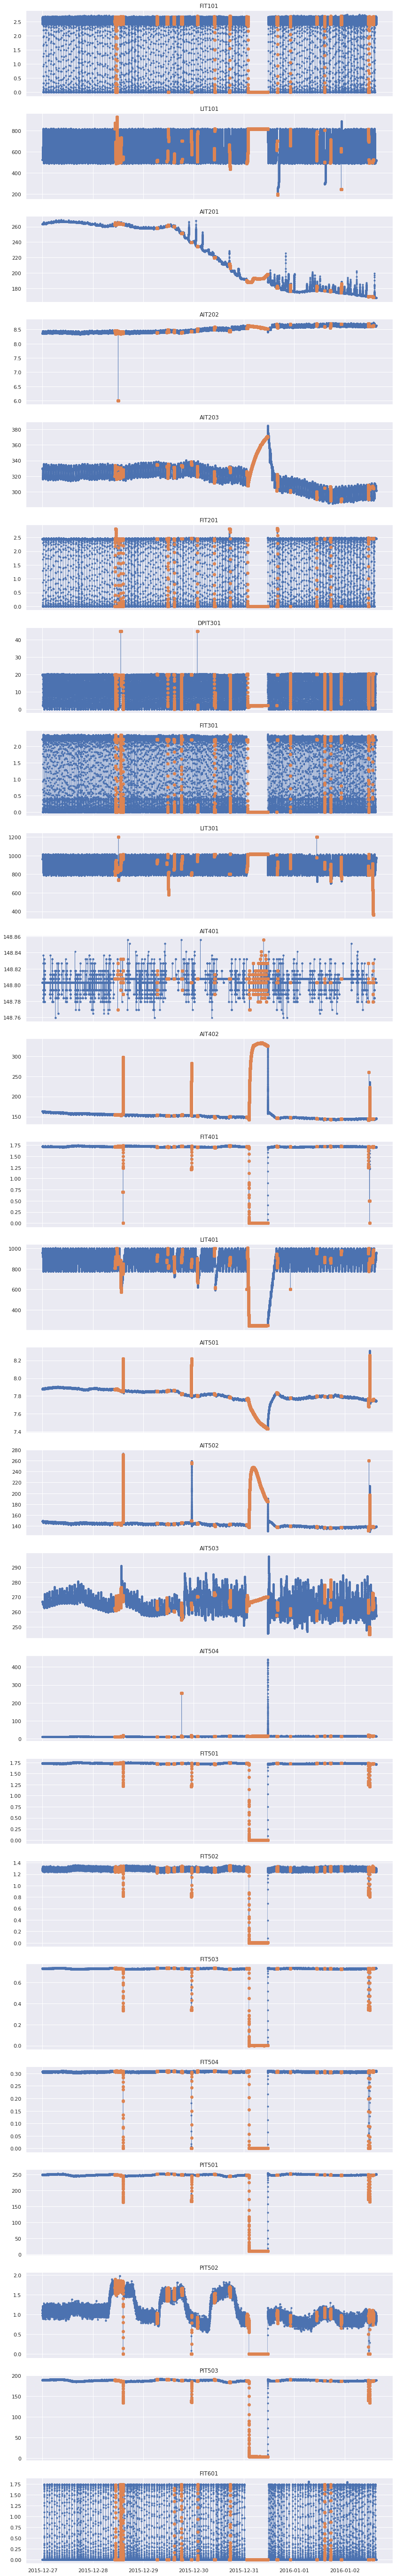

In [36]:
start, end = '2015-12-27', '2016-01-02'
features_to_plot = numerical_features

fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(14, 100), sharex=True)
for name, ax in zip(features_to_plot, axes):
    ax.plot(measurements_df.loc[start:end, name], marker='.', linestyle='-', linewidth=0.5, label=name)
    ax.plot(measurements_df.loc[attacks_timestamps, name], marker='o', linestyle='None')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### Preprocess data before training


1. Normalize numerical features

---


In [48]:
from sklearn import preprocessing

x = measurements_df[numerical_features].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(data=x_scaled, columns=numerical_features, index=measurements_df.index)

In [49]:
normalized_df.head()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 21:00:00,0.882107,0.436037,0.90279,0.981449,0.632746,0.870257,0.437857,0.929319,0.719989,0.0,...,0.499084,0.005507,0.975427,0.926173,0.983319,0.981837,0.974877,0.601626,0.972170,0.000036
2015-12-22 21:00:01,0.878162,0.436251,0.90279,0.981449,0.634563,0.869623,0.437857,0.929319,0.720277,0.0,...,0.499084,0.005507,0.975427,0.926173,0.983319,0.981837,0.974877,0.601626,0.971759,0.000036
2015-12-22 21:00:02,0.877118,0.437479,0.90279,0.981449,0.636653,0.869623,0.437572,0.929319,0.720564,0.0,...,0.499084,0.005507,0.975427,0.926173,0.983319,0.983265,0.973854,0.601626,0.971431,0.000036
2015-12-22 21:00:03,0.877118,0.438013,0.90279,0.981449,0.637561,0.870302,0.437572,0.929319,0.720851,0.0,...,0.499084,0.005507,0.975427,0.934073,0.983319,0.983265,0.973215,0.601626,0.971349,0.000036
2015-12-22 21:00:04,0.892782,0.438814,0.90279,0.981449,0.639288,0.870302,0.438213,0.929319,0.721282,0.0,...,0.499084,0.005507,0.975427,0.934073,0.981958,0.983265,0.973215,0.552846,0.970528,0.000036


In [50]:
# Add categorical features and target to normalized df
normalized_df = normalized_df.join(measurements_df[categorical_features + ['Normal/Attack']])

In [51]:
normalized_df.head()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,MV303,MV304,P301,P302,P402,P403,UV401,P501,P602,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 21:00:00,0.882107,0.436037,0.90279,0.981449,0.632746,0.870257,0.437857,0.929319,0.719989,0.0,...,1,1,1,2,2,1,2,2,1,0
2015-12-22 21:00:01,0.878162,0.436251,0.90279,0.981449,0.634563,0.869623,0.437857,0.929319,0.720277,0.0,...,1,1,1,2,2,1,2,2,1,0
2015-12-22 21:00:02,0.877118,0.437479,0.90279,0.981449,0.636653,0.869623,0.437572,0.929319,0.720564,0.0,...,1,1,1,2,2,1,2,2,1,0
2015-12-22 21:00:03,0.877118,0.438013,0.90279,0.981449,0.637561,0.870302,0.437572,0.929319,0.720851,0.0,...,1,1,1,2,2,1,2,2,1,0
2015-12-22 21:00:04,0.892782,0.438814,0.90279,0.981449,0.639288,0.870302,0.438213,0.929319,0.721282,0.0,...,1,1,1,2,2,1,2,2,1,0


## Split to test and train dataframes


---

In [53]:
print("There are timestamps with attack:",len(attacks_timestamps),
      "starting with", attacks_timestamps[0],
      "Last attack timestamp: ", attacks_timestamps[-1])

There are timestamps with attack: 54621 starting with 2015-12-28 10:29:14 Last attack timestamp:  2016-01-02 13:41:11


In [54]:
normalized_df.shape

(928719, 46)

In [60]:
train_start, train_end = '2015-12-27', '2015-12-30 11:59:59'
train_df = normalized_df.loc[train_start:train_end]
train_df.tail()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,MV303,MV304,P301,P302,P402,P403,UV401,P501,P602,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-30 11:59:55,0.910652,0.444687,0.467954,0.827789,0.145375,0.866359,0.436576,0.928240,0.691312,0.999677,...,1,1,1,2,2,1,2,2,1,0
2015-12-30 11:59:56,0.904154,0.444740,0.467954,0.827789,0.145375,0.866359,0.435723,0.928240,0.691359,0.999677,...,1,1,1,2,2,1,2,2,1,0
2015-12-30 11:59:57,0.893827,0.444526,0.467954,0.827789,0.145375,0.866359,0.436932,0.928456,0.691216,0.999677,...,1,1,1,2,2,1,2,2,1,0
2015-12-30 11:59:58,0.887329,0.444580,0.467954,0.827789,0.145375,0.866359,0.437430,0.928456,0.691790,0.999677,...,1,1,1,2,2,1,2,2,1,0
2015-12-30 11:59:59,0.881759,0.444526,0.467954,0.827789,0.145375,0.866359,0.437430,0.928456,0.691455,0.999677,...,1,1,1,2,2,1,2,2,1,0


In [61]:
validation_start, validation_end = '2015-12-30 12:00:00', '2016-1-1 11:59:59'
validation_df = normalized_df.loc[validation_start:validation_end]
validation_df.tail()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,MV303,MV304,P301,P302,P402,P403,UV401,P501,P602,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 11:59:55,0.895103,0.515642,0.094144,0.899097,0.015719,0.0,0.000996,0.006901,0.749577,0.999645,...,2,1,1,1,2,1,2,2,1,0
2016-01-01 11:59:56,0.888953,0.517137,0.094144,0.899097,0.015719,0.0,0.000996,0.012023,0.749337,0.999645,...,2,1,1,1,2,1,2,2,1,0
2016-01-01 11:59:57,0.883964,0.517938,0.094144,0.899097,0.015719,0.0,0.000996,0.032510,0.749337,0.999645,...,2,1,1,1,2,1,2,2,1,0
2016-01-01 11:59:58,0.879902,0.519112,0.094144,0.899097,0.015719,0.0,0.000996,0.056610,0.749768,0.999645,...,2,1,1,1,2,1,2,2,1,0
2016-01-01 11:59:59,0.878046,0.519913,0.094144,0.899848,0.015719,0.0,0.000996,0.085724,0.749960,0.999645,...,2,1,1,1,2,1,2,2,1,0


In [62]:
test_start = '2016-1-1 12:00:00'
test_df = normalized_df.loc[test_start:]
test_df.tail()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,MV303,MV304,P301,P302,P402,P403,UV401,P501,P602,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-02 14:59:55,0.927477,0.448477,0.000613,0.883013,0.058786,0.870030,0.453294,0.924412,0.729325,0.999645,...,1,1,1,2,2,1,2,2,1,0
2016-01-02 14:59:56,0.923532,0.449652,0.000613,0.883013,0.058786,0.870030,0.453294,0.924412,0.729373,0.999645,...,1,1,1,2,2,1,2,2,1,0
2016-01-02 14:59:57,0.917150,0.450026,0.000613,0.883013,0.058786,0.870257,0.451800,0.923981,0.728990,0.999645,...,1,1,1,2,2,1,2,2,1,0
2016-01-02 14:59:58,0.913437,0.450079,0.000613,0.883013,0.058786,0.870257,0.451018,0.923981,0.728942,0.999645,...,1,1,1,2,2,1,2,2,1,0
2016-01-02 14:59:59,0.906359,0.450613,0.000613,0.883013,0.058786,0.869577,0.450804,0.925167,0.729182,0.999645,...,1,1,1,2,2,1,2,2,1,0


In [63]:
from torch import nn
from torch.utils.data import DataLoader
from sequence_dataset import SequenceDataset

sequence_length = 5*3600 # 5 hours

train_dataset = SequenceDataset(
        train_df,
        target='Normal/Attack',
        features=categorical_features + numerical_features,
        sequence_length=sequence_length
    )

validation_dataset = SequenceDataset(
    validation_df,
    target='Normal/Attack',
    features=categorical_features + numerical_features,
    sequence_length=sequence_length
)

In [64]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

In [70]:
from shallow_regression_lstm import ShallowRegressionLSTM

learning_rate = 5e-5
num_hidden_units = 16

shallow_model = ShallowRegressionLSTM(num_sensors=len(categorical_features + numerical_features),
                                      hidden_units=num_hidden_units)
loss_function_mse = nn.MSELoss()
optimizer_adam = torch.optim.Adam(shallow_model.parameters(), lr=learning_rate)

In [71]:
def test_model(data_loader, model, loss_function):
    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Validation loss: {avg_loss}")

print("Untrained test\n--------")
test_model(validation_loader, shallow_model, loss_function_mse)
print()

Untrained test
--------
Validation loss: 0.30939003863916587



In [ ]:
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()

    for X, y in data_loader:
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")
    
    
for ix_epoch in range(3):
    print(f"Epoch {ix_epoch}\n---------")
    train_model(train_loader, shallow_model, loss_function_mse, optimizer=optimizer_adam)
    test_model(validation_loader, shallow_model, loss_function_mse)
    print()

Epoch 0
---------


/home/nastya/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:147: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:115.)
  Variable._execution_engine.run_backward(
